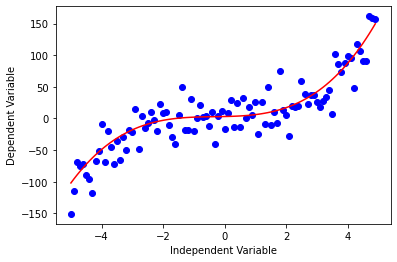

In [16]:
# plot cubic function's graph

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-5.0, 5.0, 0.1) # intervallo asse x e passo

## You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


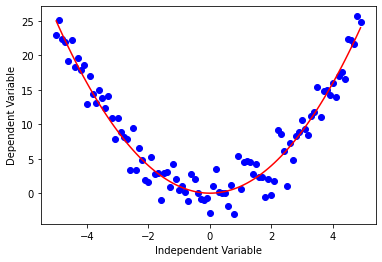

In [17]:
# Quadratic function plot
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


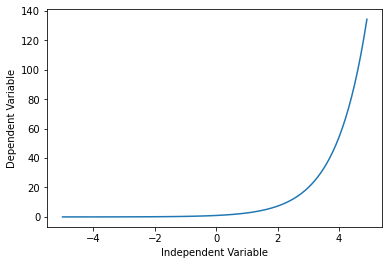

In [18]:
### Exponential plot
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


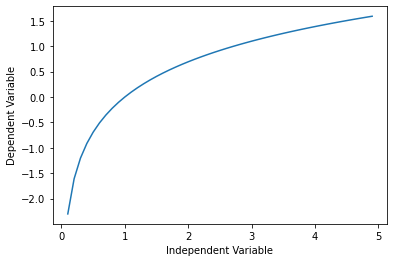

In [19]:
# Logarithmic plot 
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

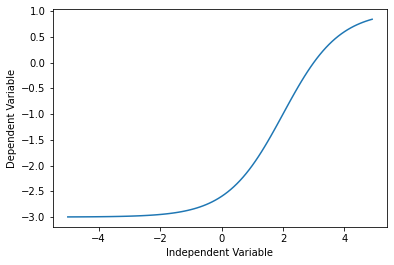

In [20]:
# Sigmoidal/Logistic plot
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [21]:
# Non-Linear Regression example (datapoints corresponding to China's GDP from 1960 to 2014. )
import numpy as np
import pandas as pd
#downloading dataset
#!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


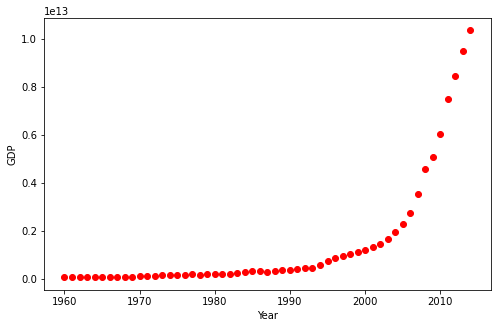

In [22]:
# Plotting the Dataset
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

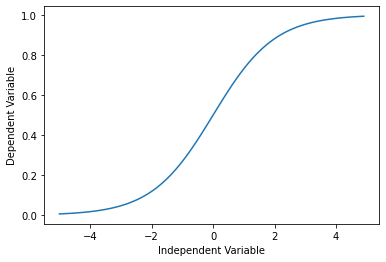

In [23]:
# Choosing a model
#La funzione logistica potrebbe essere una buona approssimazione, poiché ha la proprietà di iniziare con una crescita lenta, 
#aumentando la crescita nel mezzo, e poi decrescendo nuovamente alla fine
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

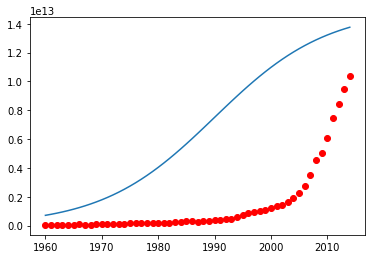

In [24]:
#Logistic function is the following: 𝑌̂ =1/[1+𝑒𝛽_1(𝑋−𝛽_2)]
#𝛽_1 : Controlla la pendenza della curva, 𝛽_2: Fa scorrere la curva sull'asse x.
# Building The Model

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [25]:
# Il nostro compito qui è trovare i parametri migliori per il nostro modello. Normalizziamo prima le nostre x e y
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

# possiamo usare curve_fit che usa i minimi quadrati non lineari per adattare la nostra funzione sigmoid ai dati.
# I valori ottimali per i parametri sono ottenuti in modo tale che la somma dei quadrati residui di sigmoid(xdata, *popt) - ydata sia ridotta al minimo.
# popt sono i nostri parametri ottimizzati.
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata) # parametri risultanti dall'ottimizzazione (beta_1 e beta_2)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.451715, beta_2 = 0.997207


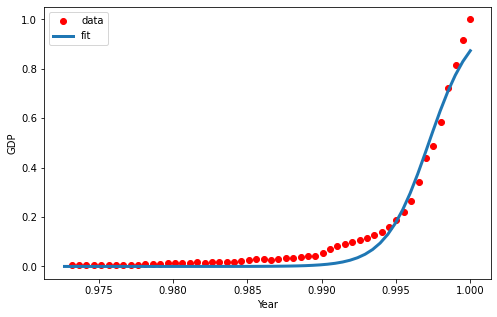

In [26]:
# Ora plottiamo il nostro modello di regressione risultante
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt) # modello risultante con i parametri ottenuti
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


In [27]:
# I can calculate what is the accuracy of our model
# Creating train and test dataset,Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive

# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y) # calcolo beta_1 e beta_2 dai dati di train

# predict using test set
y_hat = sigmoid(test_x, *popt)  # modello risultante con i parametri ottenuti con i dati di train

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))


Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.91
